In [19]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


# Exercise 1

This exercise aims at using Ensemble Methods on the Titanic dataset using the package
scikit-learn.

(a) Copy the files train titanic.csv and test titanic.csv from the website on
the course
(b) Import the data

In [11]:
df_train = pd.read_csv(fr'C:\Users\belen\Desktop\Université de Lorraine\Second semester\Machine_learning\Lab_3\titanic_train.csv')
df_test = pd.read_csv(fr'C:\Users\belen\Desktop\Université de Lorraine\Second semester\Machine_learning\Lab_3\titanic_test.csv')

(c) Describe the dataset train titanic.csv. Remove the features ‘Name’ ‘Ticket’,
‘Embarked’,’Cabin’ and ‘PassengerId’

In [3]:
df_train.describe()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  664 non-null    int64  
 1   Survived     664 non-null    int64  
 2   Pclass       664 non-null    int64  
 3   Name         664 non-null    object 
 4   Sex          664 non-null    object 
 5   Age          525 non-null    float64
 6   SibSp        664 non-null    int64  
 7   Parch        664 non-null    int64  
 8   Ticket       664 non-null    object 
 9   Fare         664 non-null    float64
 10  Cabin        149 non-null    object 
 11  Embarked     663 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 62.4+ KB


In [12]:
df_train = df_train.drop(['Name','Ticket','Embarked','Cabin','PassengerId'],axis=1)
df_test = df_test.drop(['Name','Ticket','Embarked','Cabin','PassengerId'],axis=1)

(d) Change gender into 0 (`male') ou 1 (`female') and convert the dataframe corre-
sponding to the train set train df into a numpy array :

In [13]:
df_train['Sex'].replace('male',0, inplace=True)
df_train['Sex'].replace('female',1, inplace=True)

df_test['Sex'].replace('male',0, inplace=True)
df_test['Sex'].replace('female',1, inplace=True)

C:\Users\belen\AppData\Local\Temp\ipykernel_6628\984671280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Sex'].replace('male',0, inplace=True)
C:\Users\belen\AppData\Local\Temp\ipykernel_6628\984671280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [6]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [14]:
df_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,0,20.0,1,0,7.925
1,0,2,0,32.0,2,0,73.500
2,0,2,0,25.0,0,0,13.000
3,0,3,0,NaN,0,0,7.775
4,0,3,0,43.0,0,0,8.050


(e) Impute missing values on the train set and test set using the function fillna of
the library pandas

In [15]:
# Here we use mean imputation as an example; you can adjust based on your requirements
df_train.fillna(df_train.mean(), inplace=True)

# Verify that there are no missing values
print("Missing values in df_train:", df_train.isnull().sum().sum())

df_test.fillna(df_test.mean(), inplace=True)

# Verify that there are no missing values
print("Missing values in df_train:", df_test.isnull().sum().sum())

Missing values in df_train: 0
Missing values in df_train: 0


(f) Transform the two dataframes corresponding to the train and test set into numpy
arrays

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  227 non-null    int64  
 1   Pclass    227 non-null    int64  
 2   Sex       227 non-null    int64  
 3   Age       227 non-null    float64
 4   SibSp     227 non-null    int64  
 5   Parch     227 non-null    int64  
 6   Fare      227 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 12.5 KB


In [17]:
train = df_train.to_numpy()
test = df_test.to_numpy()

2. Analysis of this dataset using Decision Trees

(a) Import sklearn and the library tree of sklearn appropriate for decision tree

In [ ]:
#Imported on the top part of this notebook

(b) Fit a decision tree on the train set

In [20]:
#First lets split train test
y_train = df_train['Survived']
X_train = df_train.drop('Survived', axis=1)
y_test = df_test['Survived']
X_test = df_test.drop('Survived', axis=1)
# Verify the shapes
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (664, 6)
Shape of y_train: (664,)
Shape of X_test: (227, 6)
Shape of y_test: (227,)


In [21]:
# Fit a decision tree on the train set
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

(c) Performance of this model on the test set?

In [23]:
# Predict the test set results
y_pred_dt = dt_model.predict(X_test)

In [24]:
# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Display confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)

# Display classification report
class_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(class_report_dt)

Decision Tree Accuracy: 0.73568281938326
Confusion Matrix:
[[107  37]
 [ 23  60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       144
           1       0.62      0.72      0.67        83

    accuracy                           0.74       227
   macro avg       0.72      0.73      0.72       227
weighted avg       0.75      0.74      0.74       227



3. Analysis of this dataset using Bagging, Random Forest and Boosting

(a) Import BaggingClassifier, RandomForestClassifier and AdaBoostClassifier
from the library sklearn.ensemble

In [25]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier


(b) Compare the performance of these methods.

In [29]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize classifiers
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
ada_boost_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train classifiers
bagging_clf.fit(X_train, y_train)
random_forest_clf.fit(X_train, y_train)
ada_boost_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging_clf.predict(X_test)
y_pred_rf = random_forest_clf.predict(X_test)
y_pred_ada = ada_boost_clf.predict(X_test)

# Evaluate Bagging
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
class_report_bagging = classification_report(y_test, y_pred_bagging)

print(f"Bagging Classifier Accuracy: {accuracy_bagging}")
print("Confusion Matrix (Bagging):")
print(conf_matrix_bagging)
print("Classification Report (Bagging):")
print(class_report_bagging)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Classifier Accuracy: {accuracy_rf}")
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)
print("Classification Report (Random Forest):")
print(class_report_rf)

# Evaluate AdaBoost
accuracy_ada = accuracy_score(y_test, y_pred_ada)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
class_report_ada = classification_report(y_test, y_pred_ada)

print(f"AdaBoost Classifier Accuracy: {accuracy_ada}")
print("Confusion Matrix (AdaBoost):")
print(conf_matrix_ada)
print("Classification Report (AdaBoost):")
print(class_report_ada)



c:\Users\belen\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Bagging Classifier Accuracy: 0.801762114537445
Confusion Matrix (Bagging):
[[119  25]
 [ 20  63]]
Classification Report (Bagging):
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       144
           1       0.72      0.76      0.74        83

    accuracy                           0.80       227
   macro avg       0.79      0.79      0.79       227
weighted avg       0.80      0.80      0.80       227

Random Forest Classifier Accuracy: 0.8105726872246696
Confusion Matrix (Random Forest):
[[119  25]
 [ 18  65]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       144
           1       0.72      0.78      0.75        83

    accuracy                           0.81       227
   macro avg       0.80      0.80      0.80       227
weighted avg       0.82      0.81      0.81       227

AdaBoost Classifier Accuracy: 0.7533039647577092
Confusion Matrix

# Exercise 2

![alt text](<Screenshot 2024-06-20 105959.png>)

1. Download the dataset on the website and import it.

In [30]:
df_fin = pd.read_csv(fr'C:\Users\belen\Desktop\Université de Lorraine\Second semester\Machine_learning\Lab_3\FinancialDistress.csv')

In [31]:
df_fin.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


2. Isolate the column of labels and transform this vector into 0/1 labels

In [32]:
# Transformar la columna 'Financial Distress' en 0/1
df_fin['Financial Distress'] = df_fin['Financial Distress'].apply(lambda x: 1 if x <= -0.50 else 0)

# Verificar la transformación
print(df_fin['Financial Distress'].value_counts())

Financial Distress
0    3536
1     136
Name: count, dtype: int64


3. Analyse now the data using Decision trees, Random Forest and GBT

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar las características (X) y la variable objetivo (y)
X = df_fin.drop(columns=['Financial Distress', 'Company', 'Time'])
y = df_fin['Financial Distress']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de datos
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (2937, 83)
Shape of X_test: (735, 83)
Shape of y_train: (2937,)
Shape of y_test: (735,)


In [34]:
# Ajustar el modelo de Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluar el modelo de Decision Tree
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt}")
print("Confusion Matrix (Decision Tree):")
print(conf_matrix_dt)
print("Classification Report (Decision Tree):")
print(class_report_dt)


Decision Tree Accuracy: 0.9428571428571428
Confusion Matrix (Decision Tree):
[[681  13]
 [ 29  12]]
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       694
           1       0.48      0.29      0.36        41

    accuracy                           0.94       735
   macro avg       0.72      0.64      0.67       735
weighted avg       0.93      0.94      0.94       735



In [35]:
# Ajustar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar el modelo de Random Forest
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)
print("Classification Report (Random Forest):")
print(class_report_rf)


Random Forest Accuracy: 0.9496598639455782
Confusion Matrix (Random Forest):
[[692   2]
 [ 35   6]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       694
           1       0.75      0.15      0.24        41

    accuracy                           0.95       735
   macro avg       0.85      0.57      0.61       735
weighted avg       0.94      0.95      0.93       735



In [36]:
# Ajustar el modelo de Gradient Boosting
gbt_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbt_model.fit(X_train, y_train)

# Evaluar el modelo de Gradient Boosting
y_pred_gbt = gbt_model.predict(X_test)
accuracy_gbt = accuracy_score(y_test, y_pred_gbt)
conf_matrix_gbt = confusion_matrix(y_test, y_pred_gbt)
class_report_gbt = classification_report(y_test, y_pred_gbt)

print(f"Gradient Boosting Accuracy: {accuracy_gbt}")
print("Confusion Matrix (Gradient Boosting):")
print(conf_matrix_gbt)
print("Classification Report (Gradient Boosting):")
print(class_report_gbt)


Gradient Boosting Accuracy: 0.9551020408163265
Confusion Matrix (Gradient Boosting):
[[689   5]
 [ 28  13]]
Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       694
           1       0.72      0.32      0.44        41

    accuracy                           0.96       735
   macro avg       0.84      0.65      0.71       735
weighted avg       0.95      0.96      0.95       735



4. What is the importance of each variable? One may see
https://scikit-learn.org/stable/auto examples/ensemble/plot forest importances.html
2

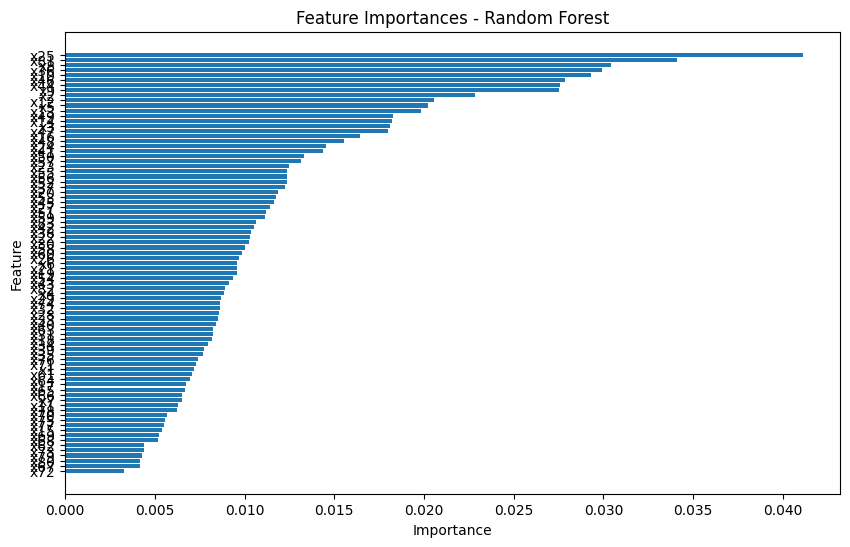

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener la importancia de las características del modelo de Random Forest
feature_importances = rf_model.feature_importances_
features = X.columns

# Crear un DataFrame para visualizar la importancia de las características
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.show()
